
--- stenosis 2 cm ---
Quadratic Model: y = (-20.628420)x² + (-0.328333)x + (0.014108)
R² Score: 0.6074
Mean Absolute Error (MAE): 0.012541
Mean Squared Error (MSE): 0.000258


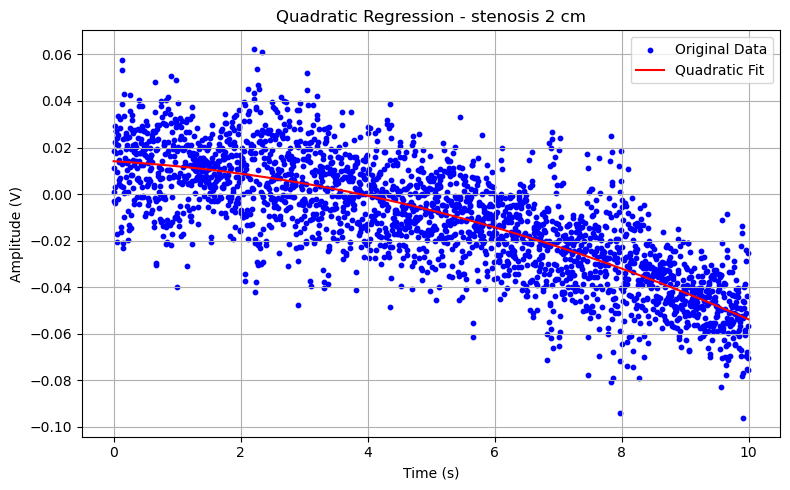


--- stenosis 3 cm ---
Quadratic Model: y = (108.214210)x² + (-1.800102)x + (-0.052831)
R² Score: 0.7482
Mean Absolute Error (MAE): 0.024871
Mean Squared Error (MSE): 0.001050


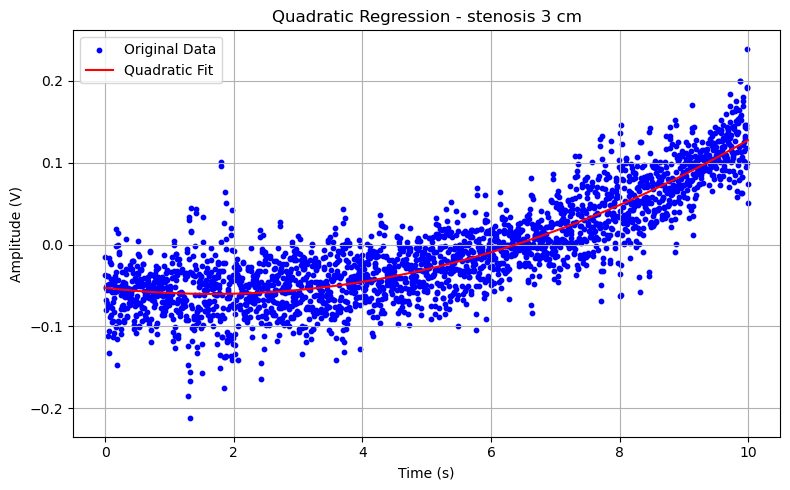


--- stenosis 6 cm ---
Quadratic Model: y = (7.011904)x² + (0.349262)x + (-0.011329)
R² Score: 0.5590
Mean Absolute Error (MAE): 0.006846
Mean Squared Error (MSE): 0.000082


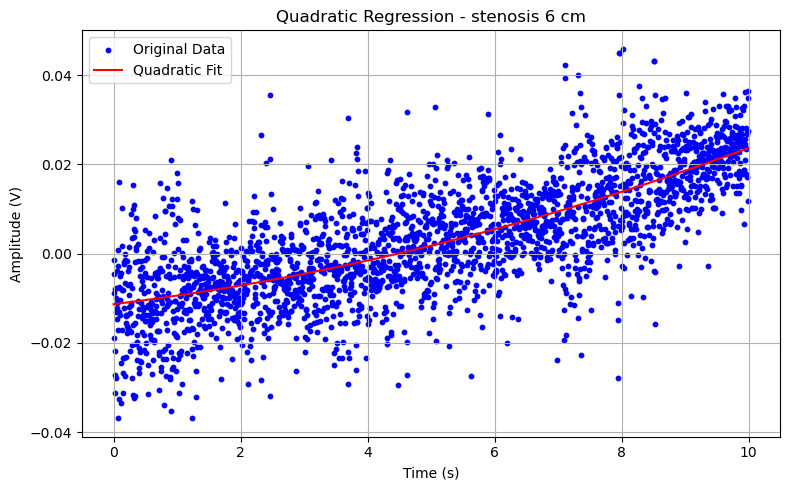

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



""" # --- Step 1: Load CSVs ---
ddf1 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_2_80_bis\\betterRecorded_signal_06.csv')
df2 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_3_70_bis\\betterRecorded_signal_01.csv')
df3 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_6_70\\betterRecorded_signal_07.csv') """

###df1 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_2_70_bis\\betterRecorded_signal_01.csv')
df1 = pd.read_csv('betterRecorded_signal_06.csv')
df2 = pd.read_csv('betterRecorded_signal_01.csv')
df3 = pd.read_csv('betterRecorded_signal_07.csv')

# --- Step 2: Convert 'Time' to numeric & sort ---
for df in [df1, df2, df3]:
    df['Time'] = pd.to_numeric(df['Time (s)'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df.sort_values('Time', inplace=True)

# --- Step 3: Rename amplitude columns ---
df1.rename(columns={'Amplitude (V)': 'Amplitude1'}, inplace=True)
df2.rename(columns={'Amplitude (V)': 'Amplitude2'}, inplace=True)
df3.rename(columns={'Amplitude (V)': 'Amplitude3'}, inplace=True)

# --- Step 4: Define quadratic regression function ---
def quadratic_regression(df, time_col, amp_col, dataset_label):
    X = df[[time_col]].values
    y = df[amp_col].values

    # Transform input features to include X^2 (quadratic terms)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict
    y_pred = model.predict(X_poly)

    # Evaluation
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Print performance
    print(f"\n--- {dataset_label} ---")
    print(f"Quadratic Model: y = ({model.coef_[2]:.6f})x² + ({model.coef_[1]:.6f})x + ({model.intercept_:.6f})")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.scatter(X*200, y, label='Original Data', color='blue', s=10)
    plt.plot(X*200, y_pred, label='Quadratic Fit', color='red')
    plt.title(f'Quadratic Regression - {dataset_label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Step 5: Apply regression to each dataset ---
quadratic_regression(df1, 'Time', 'Amplitude1', 'stenosis 2 cm')
quadratic_regression(df2, 'Time', 'Amplitude2', 'stenosis 3 cm')
quadratic_regression(df3, 'Time', 'Amplitude3', 'stenosis 6 cm')



--- stenosis 2 cm ---
Quadratic Model: y = (-21.296477)x² + (-0.284914)x + (0.013913)
R² Score (test set): 0.5912
MAE (test set): 0.013170
MSE (test set): 0.000278
MAPE (Percent Error, test set): 234.14%


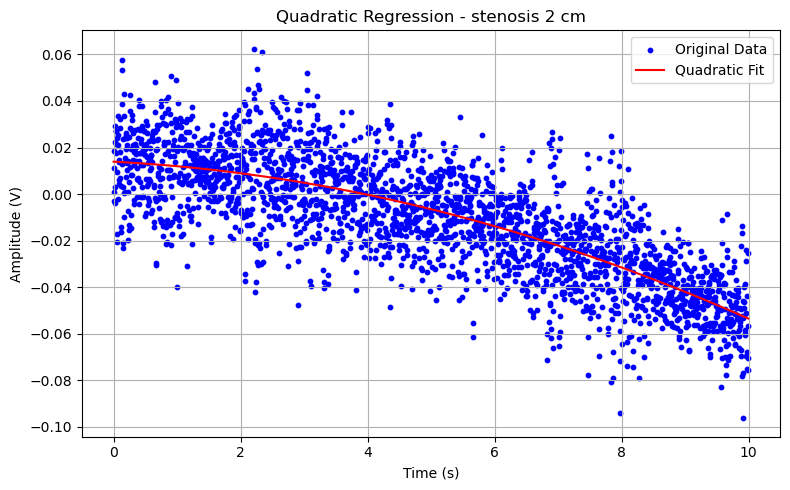


--- stenosis 3 cm ---
Quadratic Model: y = (107.564985)x² + (-1.748930)x + (-0.053502)
R² Score (test set): 0.7277
MAE (test set): 0.025473
MSE (test set): 0.001096
MAPE (Percent Error, test set): 158.19%


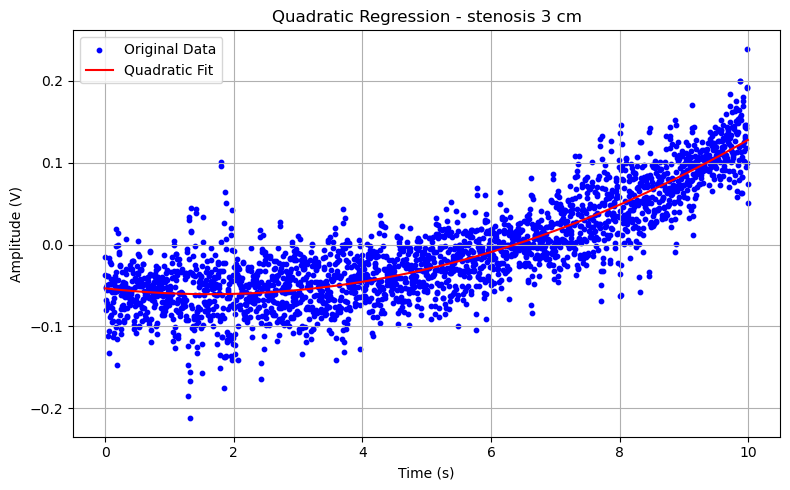


--- stenosis 6 cm ---
Quadratic Model: y = (6.958336)x² + (0.352310)x + (-0.011359)
R² Score (test set): 0.5377
MAE (test set): 0.007028
MSE (test set): 0.000086
MAPE (Percent Error, test set): 201.34%


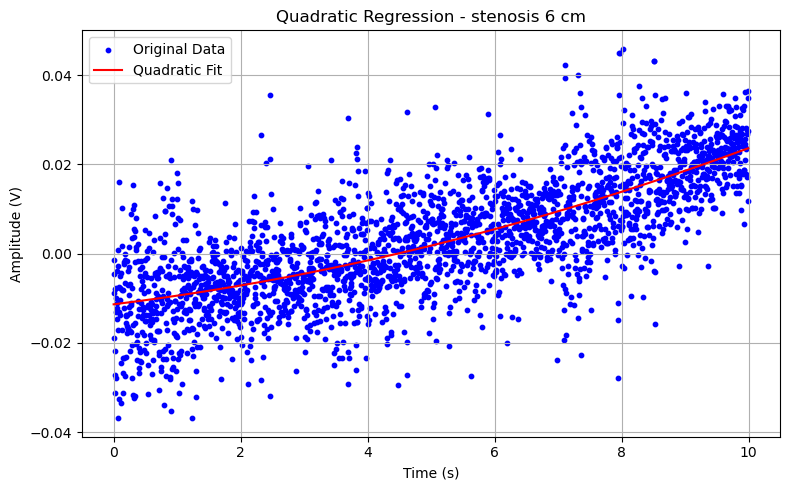

In [15]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

def quadratic_regression(df, time_col, amp_col, dataset_label):
    X = df[[time_col]].values
    y = df[amp_col].values

    # Transform input features to include quadratic terms
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # --- Split into training and testing sets (80% train, 20% test) ---
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # --- Fit the model on training data ---
    model = LinearRegression()
    model.fit(X_train, y_train)

    # --- Predict on testing data ---
    y_test_pred = model.predict(X_test)

    # --- Evaluation on test data ---
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100


    print(f"\n--- {dataset_label} ---")
    print(f"Quadratic Model: y = ({model.coef_[2]:.6f})x² + ({model.coef_[1]:.6f})x + ({model.intercept_:.6f})")
    print(f"R² Score (test set): {r2:.4f}")
    print(f"MAE (test set): {mae:.6f}")
    print(f"MSE (test set): {mse:.6f}")
    print(f"MAPE (Percent Error, test set): {mape:.2f}%")


    # --- Optional: Plot model fit on entire data for visualization ---
        # --- Optional: Plot model fit on entire data for visualization ---
    y_full_pred = model.predict(X_poly)

    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0]*200, y, label='Original Data', color='blue', s=10)
    plt.plot(X[:, 0]*200, y_full_pred, label='Quadratic Fit', color='red')
    plt.title(f'Quadratic Regression - {dataset_label}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Step 5: Apply regression to each dataset ---
quadratic_regression(df1, 'Time', 'Amplitude1', 'stenosis 2 cm')
quadratic_regression(df2, 'Time', 'Amplitude2', 'stenosis 3 cm')
quadratic_regression(df3, 'Time', 'Amplitude3', 'stenosis 6 cm')



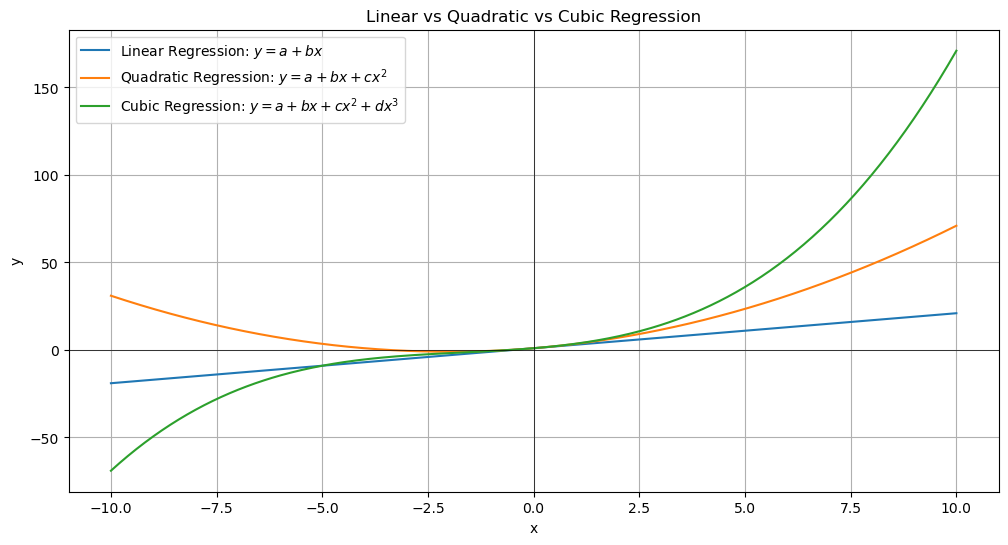

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Define the equations
a, b, c, d = 1, 2, 0.5, 0.1

# Linear: y = a + bx
y_linear = a + b * x

# Quadratic: y = a + bx + cx^2
y_quadratic = a + b * x + c * x**2

# Cubic: y = a + bx + cx^2 + dx^3
y_cubic = a + b * x + c * x**2 + d * x**3

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y_linear, label="Linear Regression: $y = a + bx$")
plt.plot(x, y_quadratic, label="Quadratic Regression: $y = a + bx + cx^2$")
plt.plot(x, y_cubic, label="Cubic Regression: $y = a + bx + cx^2 + dx^3$")

plt.title("Linear vs Quadratic vs Cubic Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()


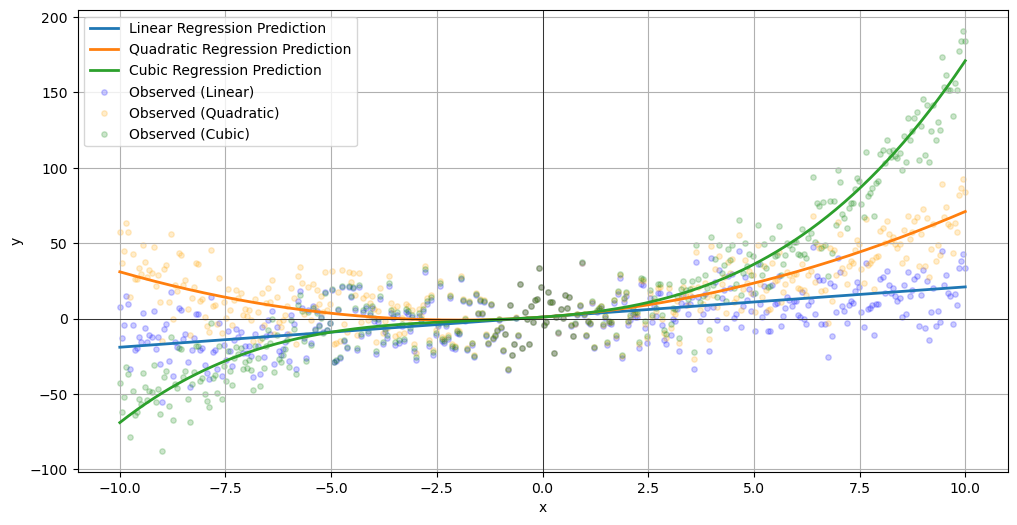

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Define the coefficients
a, b, c, d = 1, 2, 0.5, 0.1

# Define the model predictions (without error)
y_linear_pred = a + b * x
y_quadratic_pred = a + b * x + c * x**2
y_cubic_pred = a + b * x + c * x**2 + d * x**3

# Simulate observed values by adding random noise epsilon (error)
np.random.seed(0)  # For reproducibility
epsilon = np.random.normal(0, 15, size=x.shape)  # noise with std dev = 15

y_linear_obs = y_linear_pred + epsilon
y_quadratic_obs = y_quadratic_pred + epsilon
y_cubic_obs = y_cubic_pred + epsilon

# Plotting
plt.figure(figsize=(12, 6))

# Plot predicted curves
plt.plot(x, y_linear_pred, label="Linear Regression Prediction", linewidth=2)
plt.plot(x, y_quadratic_pred, label="Quadratic Regression Prediction", linewidth=2)
plt.plot(x, y_cubic_pred, label="Cubic Regression Prediction", linewidth=2)

# Plot observed data (with error)
plt.scatter(x, y_linear_obs, color='blue', s=15, alpha=0.2, label="Observed (Linear)")
plt.scatter(x, y_quadratic_obs, color='orange', s=15, alpha=0.2, label="Observed (Quadratic)")
plt.scatter(x, y_cubic_obs, color='green', s=15, alpha=0.2, label="Observed (Cubic)")

#plt.title("Regression Models with Error Term $\\varepsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()


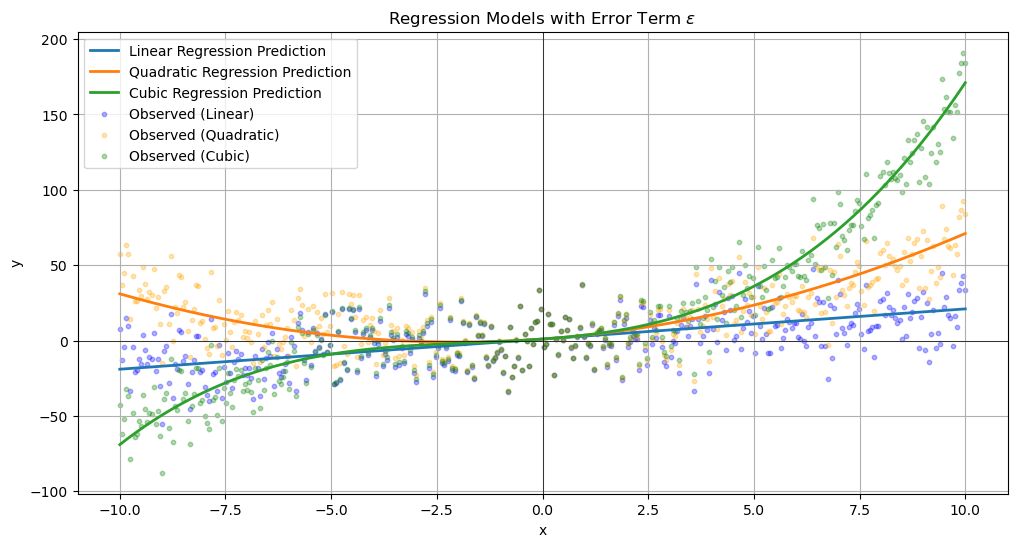

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Coefficients
a, b, c, d = 1, 2, 0.5, 0.1

# Predicted values without error
y_linear_pred = a + b * x
y_quadratic_pred = a + b * x + c * x**2
y_cubic_pred = a + b * x + c * x**2 + d * x**3

# Simulate noise as error term ε
np.random.seed(0)  # For consistent results
epsilon = np.random.normal(0, 15, size=x.shape)  # Mean=0, SD=15

# Observed values = predicted + error
y_linear_obs = y_linear_pred + epsilon
y_quadratic_obs = y_quadratic_pred + epsilon
y_cubic_obs = y_cubic_pred + epsilon

# Plot predicted regression curves
plt.figure(figsize=(12, 6))
plt.plot(x, y_linear_pred, label="Linear Regression Prediction", linewidth=2)
plt.plot(x, y_quadratic_pred, label="Quadratic Regression Prediction", linewidth=2)
plt.plot(x, y_cubic_pred, label="Cubic Regression Prediction", linewidth=2)

# Plot observed data points with error ε
plt.scatter(x, y_linear_obs, color='blue', s=10, alpha=0.3, label="Observed (Linear)")
plt.scatter(x, y_quadratic_obs, color='orange', s=10, alpha=0.3, label="Observed (Quadratic)")
plt.scatter(x, y_cubic_obs, color='green', s=10, alpha=0.3, label="Observed (Cubic)")

plt.title("Regression Models with Error Term $\\varepsilon$")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()
